In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
from sklearn.cluster import KMeans
from PIL import Image as im
from PIL import Image

# Without Normalization using PLT

In [ ]:
path = "CESM_csvfile"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    
    if os.path.isfile(f): 
        f_name = 'CESM_csvfile/' + f[13:]
        f_name_new = f_name[:-4]
    data = pd.read_csv(f_name, header = None)
    arr = data.values
    train = arr.reshape(-1,1)
    
    numberofcluster = (train.max() - train.min())//100
    kmeans = KMeans(n_clusters =numberofcluster).fit(train)
                    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(arr.shape)
    filped_img = np.flip(segmented_img,0)
    
    plt.figure(figsize=(18,10))
    plt.imshow(filped_img, cmap = 'gray')
    
    plt.savefig('CESM_pressureonly_imgfile/'+ f_name_new[13:] +'.png')

# Without Normalization using IMAGE

In [ ]:
path = "../RawData/CESMZ200/CESM_csvfile"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    
    if os.path.isfile(f): 
        f_name = '../RawData/CESMZ200/CESM_csvfile/' + f[33:]
        f_name_new = f_name[:-4]
    data = pd.read_csv(f_name, header = None)
    arr = data.values
    train = arr.reshape(-1,1)
    
    numberofcluster = (train.max() - train.min())//100
    kmeans = KMeans(n_clusters =numberofcluster).fit(train)
                    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(arr.shape)
    filped_img = np.flip(segmented_img,0)
    
        
    image_result_sum = im.fromarray(np.uint8(filped_img))
    image_result_sum.save('../Outputs/Pressure_wout_norm_IMAGE/'+ f_name_new[33:] +'.png')

# With Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

path = "CESM_csvfile"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    
    if os.path.isfile(f): 
        f_name = 'CESM_csvfile/' + f[13:]
        f_name_new = f_name[:-4]
    data = pd.read_csv(f_name, header = None)
    arr = data.values
    train = arr.reshape(-1,1)
    
    numberofcluster = (train.max() - train.min())//100
    
    scaler= StandardScaler()
    train_scaled =scaler.fit_transform(train) 
    kmeans = KMeans(n_clusters =numberofcluster).fit(train_scaled)
                    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(arr.shape)
    filped_img = np.flip(segmented_img,0)
    
    plt.figure(figsize=(18,10))
    plt.imshow(filped_img, cmap = 'gray')
    
    plt.savefig('CESM_pressureonly_normalization_imgfile/'+ f_name_new[13:] +'.png')

# with norm using IMGAE(need repair)

In [9]:
from sklearn.preprocessing import StandardScaler

path = "../RawData/CESMZ200/CESM_csvfile"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    
    if os.path.isfile(f): 
        f_name = '../RawData/CESMZ200/CESM_csvfile/' + f[33:]
        f_name_new = f_name[:-4]
    data = pd.read_csv(f_name, header = None)
    arr = data.values
    train = arr.reshape(-1,1)
    
    numberofcluster = (train.max() - train.min())//100
    
    scaler= StandardScaler()
    train_scaled =scaler.fit_transform(train) 
    kmeans = KMeans(n_clusters =numberofcluster).fit(train_scaled)
                    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(arr.shape)
    
    image_result_first = im.fromarray(np.uint8(segmented_img))
    image_result_sum_FlipHoz = image_result_first.transpose(Image.FLIP_TOP_BOTTOM)
    image_result_sum_FlipHoz.save('../Outputs/Pressure_with_norm_IMAGE/'+ f_name_new[33:] +'.png') 

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

# Clusters wout norm +0 IMAGE

In [8]:
path = "../RawData/CESMZ200/CESM_csvfile"
for filename in os.listdir(path):
    f = os.path.join(path,filename)
    
    if os.path.isfile(f): 
        f_name = 'CESM_csvfile/' + f[33:]
        f_name_new = f_name[:-4]
        print(f_name_new)         
    data = pd.read_csv(f_name, header = None)
    arr = data.values
    train = arr.reshape(-1,1)
    os.mkdir(f_name_new[13:])
    
    numberofcluster = (train.max() - train.min())//100
    kmeans = KMeans(n_clusters =numberofcluster).fit(train)
    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(arr.shape)
    
    temp = kmeans.labels_.copy()
    
    for i in range(0,numberofcluster):
        temp = np.where(segmented_img == kmeans.cluster_centers_[i],255,0)
        image_result_first = im.fromarray(np.uint8(temp))
        image_result_sum_FlipHoz = image_result_first.transpose(Image.FLIP_TOP_BOTTOM)
        image_result_sum_FlipHoz.save(f_name_new[33:] + '/test_c'+str(i+1)+'.png')
    
    plt.figure(figsize=(113/120,74/120), dpi=120)
    plt.imshow(filped_img, cmap = 'gray')

    plt.axis('off')
    plt.savefig('my_fig.png',bbox_inches='tight', dpi=120, pad_inches = 0)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'CESM_csvfile'

# for testing only

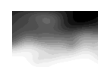

In [9]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../RawData/CESMZ200/CESM_csvfile/day21.csv', header = None)
arr = data.values
train = arr.reshape(-1,1)
    
numberofcluster = (train.max() - train.min())//100 + 1

scaler= StandardScaler()
train_scaled =scaler.fit_transform(train) 
kmeans = KMeans(n_clusters =numberofcluster).fit(train_scaled)

                    
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(arr.shape)

for i in range(0,numberofcluster):
    temp = np.where(segmented_img == kmeans.cluster_centers_[i],255,0)
    image_result_first = im.fromarray(np.uint8(temp))
    image_result_sum_FlipHoz = image_result_first.transpose(Image.FLIP_TOP_BOTTOM)
    image_result_sum_FlipHoz.save('test_c'+str(i+1)+'.png')
filped_img = np.flip(segmented_img,0)
    
plt.figure(figsize=(113/120,74/120), dpi=120)
plt.imshow(filped_img, cmap = 'gray')

plt.axis('off')
plt.savefig('my_fig.png',bbox_inches='tight', dpi=120, pad_inches = 0)